# FIFA WORLD CUP DATA ANALYSIS (Unified Mentor Internship Project)

## Problem Statement:

* With FIFA being in the blood as many people of the world. You are tasked to tell the story of unsung analysts who put great efforts to provide accurate data to answer every question of fans.

* The FIFA World Cup is a global football competition contested by the various football- playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.

* The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.

* Find key metrics and factors that influence the World Cup win.Do your own research and come up with your findings.

## Solution Statement : 

* In this project i am going to conduct an analysis on "FIFA-World-Cup" dataset witch can be accessed from Unified Mentor Internship Project.

*  Project Title       - FIFA World Cup Analysis
*  Technology          -  Data Science
*  Domain              -  Sports
*  Difficulties Level  -  Advanced
*  Dataset link        -  https://drive.google.com/file/d/1R4cUpUh0FTZGVcJiKSOsqHXEJ6l1zwS-/view

# Data Preparation and Cleaning

* In this section I will be using some data preparation and data cleaning techniques to make my datasets easy and suitable to     use and having information about them (like knowing how many number of columns and rows they have, ranges of values etc). I     will start by loading them into a data frame with the help of Pandas library, and then perform further steps on them.
* I prefer to start by importing all libraries that i think i will need

# Imported the required Libraries

In [47]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
%matplotlib inline
import pandas as pd
import seaborn as sns 
import itertools
from warnings import filterwarnings
filterwarnings('ignore')
from plotly.offline import iplot
import plotly as py 
import plotly.tools as tls 
py.offline.init_notebook_mode(connected=True)
import cufflinks as cf 
cf.go_offline()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Reading the WorldCup Matches data set:

In [49]:
df_matches = pd.read_csv('WorldCupMatches.csv')

In [50]:
# Display top 5 rows in dataframe
display(df_matches.head())

# display the statistical information of the dataframe
display(df_matches.describe())

# display the information of the dataframe
display(df_matches.info())

# Display the dimention of the dataframe
display('Shape of Matches' , df_matches.shape)
print(f"The matches data set has {df_matches.shape[0]} rows and {df_matches.shape[1]} columns")

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

None

'Shape of Matches'

(4572, 20)

The matches data set has 4572 rows and 20 columns


In [51]:
# Checking if i have some null values
df_matches.isna().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

* This shows that all columns have the same number of null values, whitch means that maybe they start at the same index and end at the same index. but i have to delete all of them

<Axes: >

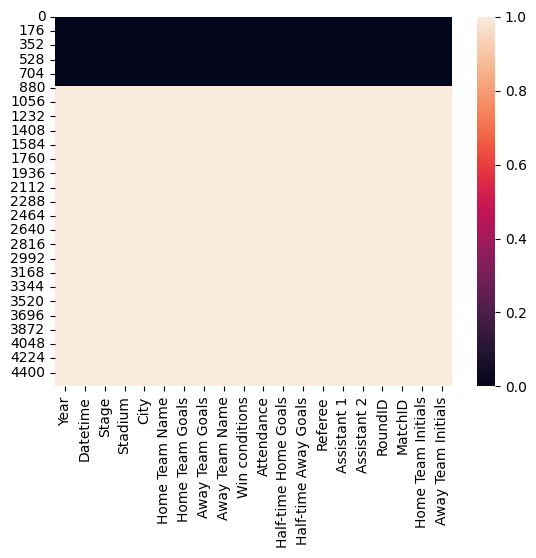

In [52]:
# Visualization of null values

sns.heatmap(df_matches.isna(), cbar=True)

* This shows that null values start at the same index, then i can know that index by checking the last valid index of the dataset



In [53]:
df_matches.last_valid_index()

851

* This means that from the row 852, all values are NaN let me check that

In [54]:
df_matches[850:860]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# dropping all the null values

df_matches = df_matches.dropna()

In [56]:
# now rechecking for the null values

df_matches.isna().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

* Now we can see there are zero null values in the matchces dataset.

=> Now i am going to check if there is some data redundance, then delete them if exist to make sure that no duplicates in my Matches datasets.

In [57]:
df_matches_dup = df_matches[df_matches.duplicated(keep='last')]
df_matches_dup

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
820,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
821,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
822,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
824,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
825,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
826,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
827,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
828,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG
829,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
830,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC


In [58]:
df_Matches_dup1 = df_matches[df_matches.duplicated(keep = "first" )]
df_Matches_dup1

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
836,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
837,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
838,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
839,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
840,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
842,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
843,2014.0,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA
844,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
845,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
846,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL


In [59]:
# Shape of duplicate values

df_matches_dup.shape

(15, 20)

* This shows that i have 15 rows duplicates data, so i have to remove them.

In [60]:
# Removing duplicate values

df_matches = df_matches.drop_duplicates()

In [61]:
# seeing the dimentions of data frames after dropping null and duplicatd values
display('Shape of Matches' , df_matches.shape)
print(f"The matches data set has {df_matches.shape[0]} rows and {df_matches.shape[1]} columns")

'Shape of Matches'

(835, 20)

The matches data set has 835 rows and 20 columns


* Now World Cup Matches dataset does not contain any null and duplicate values.
* So i m going to remove columns that i think i will not need.

In [62]:
# Showing all the available columns in the matches dataset

df_matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [63]:
del df_matches['RoundID']

### Now I am going to do small analysis on Players and Cups dataset.

# Reading the WorldCup Players data set:

In [64]:
df_players = pd.read_csv('WorldCupPlayers.csv')

In [65]:
# Display top 5 rows in dataframe
display(df_players.head())

# display the statistical information of the dataframe
display(df_players.describe())

# display the information of the dataframe
display(df_players.info())

# Display the dimention of the dataframe
display('Shape of Matches' , df_players.shape)
print(f"The matches data set has {df_players.shape[0]} rows and {df_players.shape[1]} columns")

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


None

'Shape of Matches'

(37784, 9)

The matches data set has 37784 rows and 9 columns


In [66]:
# Checking if i have some null values
df_players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

<Axes: >

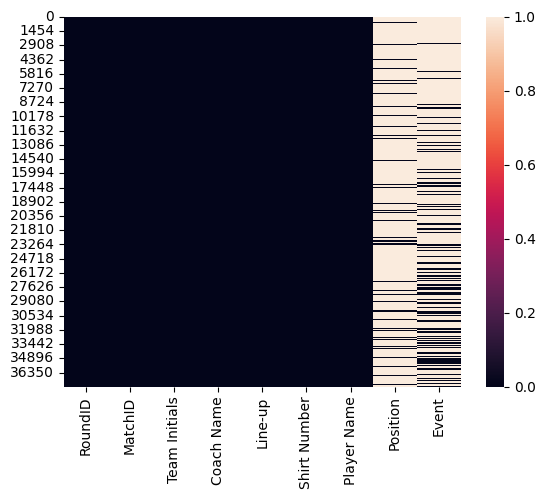

In [67]:
# Visualization of null values
sns.heatmap(df_players.isnull(), cbar= True)

* This graph is showing that we have null values in position and event columns only.

In [68]:
# Dropping all the null values
df_players = df_players.dropna()

=> Now i am going to check if there is some data redundance, then delete them if exist to make sure that no duplicates in my Players datasets.

In [69]:
df_players_dup = df_players[df_players.duplicated(keep = "last")]
df_players_dup

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
36407,255951,300186462,NGA,KESHI Stephen (NGA),S,2,YOBO,C,W90'
36457,255951,300186460,ALG,HALILHODZIC Vahid (BIH),S,5,HALLICHE,C,Y42' O97'
36460,255951,300186460,GER,LOEW Joachim (GER),S,16,LAHM,C,Y107'
36496,255953,300186461,BRA,SCOLARI Luiz Felipe (BRA),S,12,JULIO CESAR,GK,Y78'
36498,255953,300186461,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,G7' Y64'
36501,255953,300186461,COL,PEKERMAN Jose (ARG),S,3,YEPES,C,Y69'
36635,255957,300186502,NED,Louis VAN GAAL (NED),S,1,CILLESSEN,GK,O90'
36636,255957,300186502,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,Y2'
36647,255957,300186502,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,P3'
36657,255957,300186502,NED,Louis VAN GAAL (NED),N,22,VORM,GK,I90'


In [70]:
df_players_dup1 = df_players[df_players.duplicated(keep = "first")]
df_players_dup1

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37147,255951,300186508,MEX,HERRERA Miguel (MEX),S,4,R. MARQUEZ,C,Y90'
37150,255951,300186508,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,O76'
37186,255951,300186459,CRC,PINTO Jorge Luis (COL),S,1,NAVAS K.,GK,Y90'
37200,255951,300186459,CRC,PINTO Jorge Luis (COL),S,10,RUIZ B.,C,G52' Y70'
37235,255951,300186462,NGA,KESHI Stephen (NGA),S,2,YOBO,C,W90'
37285,255951,300186460,ALG,HALILHODZIC Vahid (BIH),S,5,HALLICHE,C,Y42' O97'
37288,255951,300186460,GER,LOEW Joachim (GER),S,16,LAHM,C,Y107'
37374,255951,300186497,BEL,WILMOTS Marc (BEL),S,4,KOMPANY,C,Y42'
37462,255953,300186461,BRA,SCOLARI Luiz Felipe (BRA),S,12,JULIO CESAR,GK,Y78'
37464,255953,300186461,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,G7' Y64'


In [71]:
# Shape of duplicate values in Players dataset

df_players_dup.shape

(18, 9)

In [72]:
# Removing duplicate values 

df_players = df_players.drop_duplicates()

In [73]:
# After removing null and duplicated values see the dataframe shape
display('Shape of Matches' , df_players.shape)
print(f"The matches data set has {df_players.shape[0]} rows and {df_players.shape[1]} columns")

'Shape of Matches'

(555, 9)

The matches data set has 555 rows and 9 columns


# Reading the Worldcup Cups data set:

In [74]:
df_cups = pd.read_csv('WorldCups.csv')

In [75]:
# Displaying the top 5 rows of the dataframe ( Cups )
display(df_cups.head())

# Displaying the statistical information for the dataframe
display(df_cups.describe())

# Displaying the information of the dataframe
display(df_cups.info())


# Displaying the dimentions of data frames(Cups)

display ("Shape of df_Cups " , df_cups.shape)
print(f"The Cups data set has {df_cups.shape[0]} rows and {df_cups.shape[1]} columns")


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


None

'Shape of df_Cups '

(20, 10)

The Cups data set has 20 rows and 10 columns


In [76]:
# Checking for the null values in cups dataset
df_cups.isna().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

* This shows us that Cups dataset does't have any null values

In [77]:
class color:
    BOLD =  '\033[1m'
    END = '\033[0m'
def show_dtypes(x):
    for col in x.columns:
        print(color.BOLD +col+ color.END,"::",x[col].dtypes)

In [78]:
# Display data types in {Maches} data set

display('Dtypes of MAtches')
print("-------------------")
print("=====================")
display(show_dtypes(df_matches))

'Dtypes of MAtches'

-------------------
Year :: float64
Datetime :: object
Stage :: object
Stadium :: object
City :: object
Home Team Name :: object
Home Team Goals :: float64
Away Team Goals :: float64
Away Team Name :: object
Win conditions :: object
Attendance :: float64
Half-time Home Goals :: float64
Half-time Away Goals :: float64
Referee :: object
Assistant 1 :: object
Assistant 2 :: object
MatchID :: float64
Home Team Initials :: object
Away Team Initials :: object


None

In [79]:
# Display data types in {Players} data set

display('Dtypes of Players')
print("-------------------")
print("=====================")
display(show_dtypes(df_players))

'Dtypes of Players'

-------------------
RoundID :: int64
MatchID :: int64
Team Initials :: object
Coach Name :: object
Line-up :: object
Shirt Number :: int64
Player Name :: object
Position :: object
Event :: object


None

In [80]:
# Display data types in {Cups} data set

display('Dtypes of Cups')
print("-------------------")
print("=====================")
display(show_dtypes(df_cups))

'Dtypes of Cups'

-------------------
Year :: int64
Country :: object
Winner :: object
Runners-Up :: object
Third :: object
Fourth :: object
GoalsScored :: int64
QualifiedTeams :: int64
MatchesPlayed :: int64
Attendance :: object


None

In [81]:
from scipy import stats
def Tabulation(x):
    table = pd.DataFrame(x.dtypes, columns=['dtype'])
    table1 = pd.DataFrame(x.columns, columns=['Names'])
    table = table.reset_index()
    table = table.rename(columns = {'index':'Name'})
    table['No of Missing'] = x.isna().sum().values
    table['no of Uniques'] = x.nunique().values
    table['Percent of Missing'] = ((x.isna().sum().values)/(x.shape[0]))*100
    table['First Observation'] = x.loc[0].values
    table['Second Observation'] = x.loc[1].values
    table['Third Observation'] = x.loc[2].values
    for name in table['Name'].value_counts().index:
        table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(x[name].value_counts(normalize=True),base=2),2)
    return table

In [82]:
Tabulation(df_matches)

,Name,dtype,No of Missing,no of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,Year,float64,0,20,0.0,1930.0,1930.0,1930.0,4.20
1,Datetime,object,0,601,0.0,13 Jul 1930 - 15:00,13 Jul 1930 - 15:00,14 Jul 1930 - 12:45,9.03
2,Stage,object,0,23,0.0,Group 1,Group 4,Group 2,4.19
3,Stadium,object,0,181,0.0,Pocitos,Parque Central,Parque Central,7.30
4,City,object,0,151,0.0,Montevideo,Montevideo,Montevideo,6.99
5,Home Team Name,object,0,78,0.0,France,USA,Yugoslavia,5.39
6,Home Team Goals,float64,0,11,0.0,4.0,3.0,2.0,2.51
7,Away Team Goals,float64,0,7,0.0,1.0,0.0,1.0,1.92
8,Away Team Name,object,0,83,0.0,Mexico,Belgium,Brazil,5.90
9,Win conditions,object,0,43,0.0,,,,0.70


In [84]:
Tabulation(df_cups)

,Name,dtype,No of Missing,no of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,Year,int64,0,20,0.0,1930,1934,1938,4.32
1,Country,object,0,15,0.0,Uruguay,Italy,France,3.82
2,Winner,object,0,9,0.0,Uruguay,Italy,Italy,2.90
3,Runners-Up,object,0,10,0.0,Argentina,Czechoslovakia,Hungary,3.21
4,Third,object,0,14,0.0,USA,Germany,Brazil,3.68
5,Fourth,object,0,16,0.0,Yugoslavia,Austria,Sweden,3.88
6,GoalsScored,int64,0,17,0.0,70,70,84,4.02
7,QualifiedTeams,int64,0,5,0.0,13,16,15,2.04
8,MatchesPlayed,int64,0,9,0.0,18,17,18,2.90
9,Attendance,object,0,20,0.0,590.549,363.000,375.700,4.32


In [85]:
def show_unique(x):
    class color:
        BOLD = '\033[1m'
        END = '\033[0m'
    for col in x.columns:
        print('Total Unique ' + color.BOLD +col+ color.END + " Values in Train data {}".format(x[col].nunique()))

In [86]:
show_unique(df_matches)

Total Unique Year Values in Train data 20
Total Unique Datetime Values in Train data 601
Total Unique Stage Values in Train data 23
Total Unique Stadium Values in Train data 181
Total Unique City Values in Train data 151
Total Unique Home Team Name Values in Train data 78
Total Unique Home Team Goals Values in Train data 11
Total Unique Away Team Goals Values in Train data 7
Total Unique Away Team Name Values in Train data 83
Total Unique Win conditions Values in Train data 43
Total Unique Attendance Values in Train data 622
Total Unique Half-time Home Goals Values in Train data 7
Total Unique Half-time Away Goals Values in Train data 6
Total Unique Referee Values in Train data 366
Total Unique Assistant 1 Values in Train data 387
Total Unique Assistant 2 Values in Train data 408
Total Unique MatchID Values in Train data 835
Total Unique Home Team Initials Values in Train data 77
Total Unique Away Team Initials Values in Train data 82


In [87]:
show_unique(df_players)

Total Unique RoundID Values in Train data 81
Total Unique MatchID Values in Train data 423
Total Unique Team Initials Values in Train data 76
Total Unique Coach Name Values in Train data 225
Total Unique Line-up Values in Train data 2
Total Unique Shirt Number Values in Train data 24
Total Unique Player Name Values in Train data 347
Total Unique Position Values in Train data 3
Total Unique Event Values in Train data 311


In [88]:
show_unique(df_cups)

Total Unique Year Values in Train data 20
Total Unique Country Values in Train data 15
Total Unique Winner Values in Train data 9
Total Unique Runners-Up Values in Train data 10
Total Unique Third Values in Train data 14
Total Unique Fourth Values in Train data 16
Total Unique GoalsScored Values in Train data 17
Total Unique QualifiedTeams Values in Train data 5
Total Unique MatchesPlayed Values in Train data 9
Total Unique Attendance Values in Train data 20


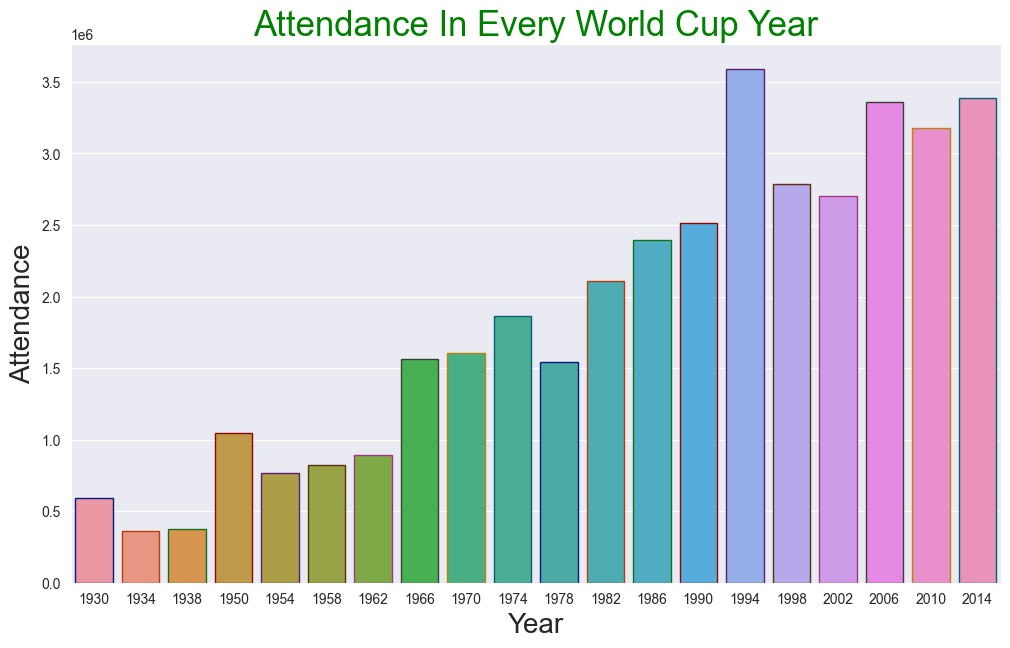

In [109]:
def Attendance_by_year_bar_plot(x):
    att = x.groupby("Year")["Attendance"].sum().reset_index()
    att["Year"] = att["Year"].astype(int)
    plt.figure(figsize=(12, 7))
    
    sns.barplot(data=att, x="Year", y="Attendance", linewidth=1, edgecolor=sns.color_palette("dark", len(att)))  # Use a color palette
    
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Attendance", fontsize=20)
    plt.title("Attendance In Every World Cup Year", fontsize=25, color="green")
    plt.show()

Attendance_by_year_bar_plot(df_matches)


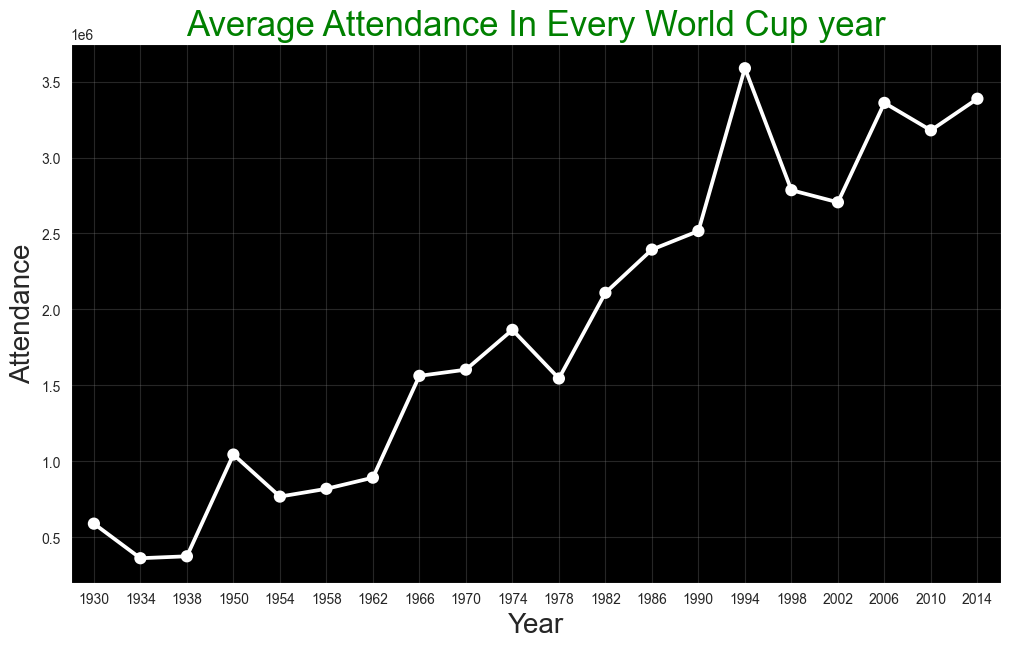

In [107]:
def Average_Attendance_by_year(x):
    att1 = x.groupby("Year")["Attendance"].sum().reset_index()
    att1["Year"] = att1["Year"].astype(int)
    plt.figure(figsize=(12, 7))
    
    ax = sns.pointplot(data=att1, x="Year", y="Attendance", color="w")
    ax.set_facecolor("k")
    
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Attendance", fontsize=20)
    plt.grid(True, color="grey", alpha=0.3)
    plt.title("Average Attendance In Every World Cup year", fontsize=25, color="green")
    plt.show()

Average_Attendance_by_year(df_matches)


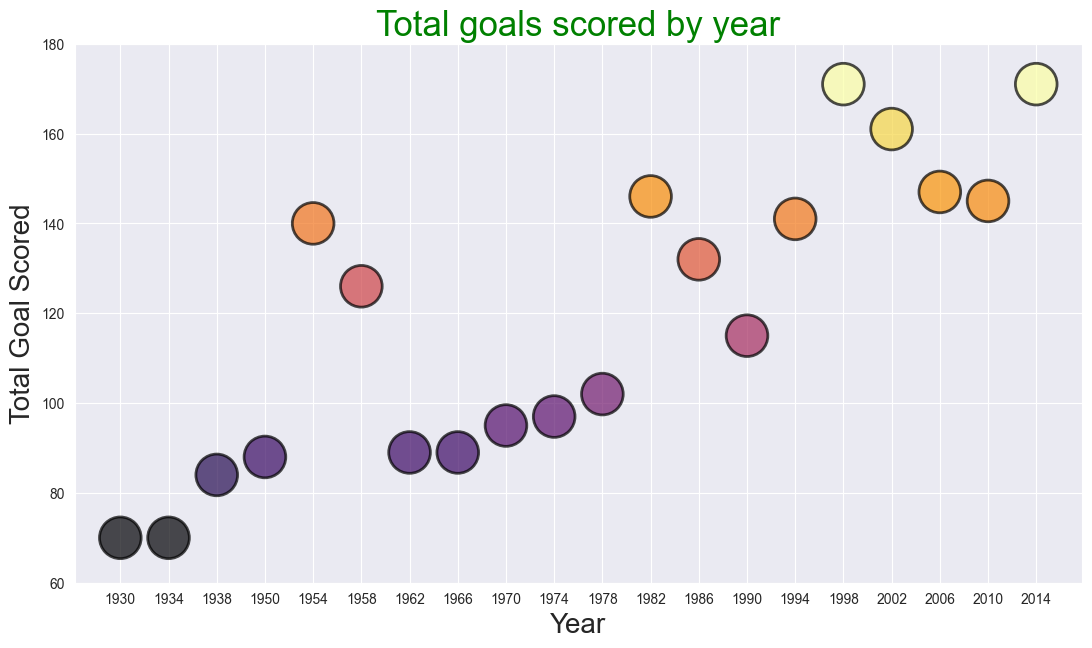

In [100]:
# Here i m showing total goals scored by year using scatter plot

def Total_Goals_Scored_by_year(x):
    plt.figure(figsize=(13,7))
    x["Year1"] = x["Year"].astype(str)
    
    ax = plt.scatter("Year1","GoalsScored",
                     data=df_cups,
                     c=df_cups["GoalsScored"],
                     cmap="inferno",
                     s=900,
                     alpha=.7,
                     linewidth=2,
                     edgecolor="k")

    plt.xticks(x["Year1"].unique())
    plt.yticks(np.arange(60,200,20))
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Total Goal Scored",fontsize=20)
    plt.title('Total goals scored by year', fontsize = 25 , color = "green")
    plt.show()
Total_Goals_Scored_by_year(df_cups)

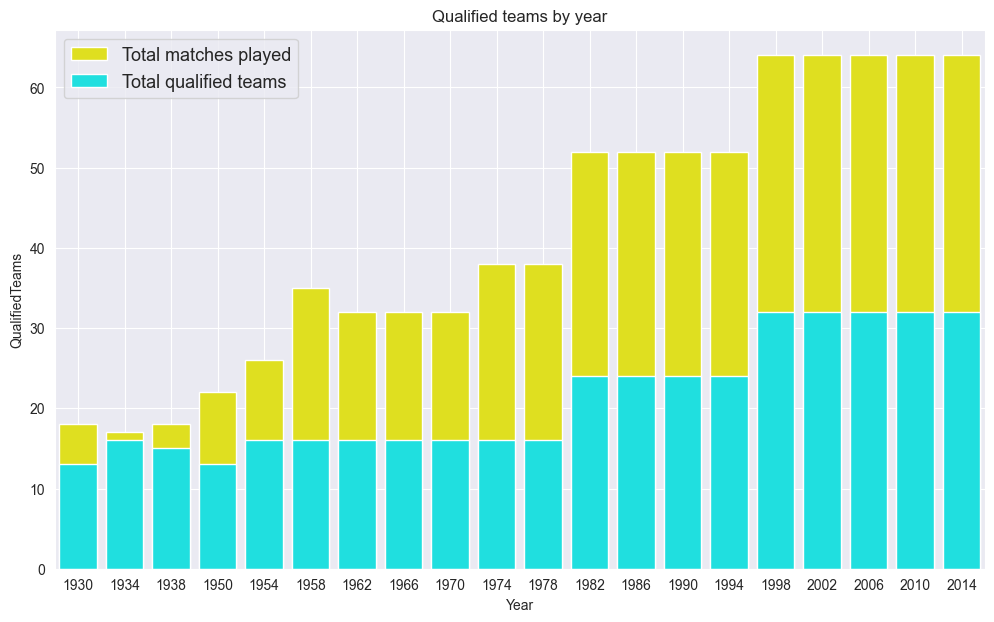

In [106]:
def Qualifies_Teams(x):
    plt.figure(figsize=(12, 7))

    sns.barplot(data=x, x="Year", y="MatchesPlayed",
                color="yellow",
                label="Total matches played")

    sns.barplot(data=x, x="Year", y="QualifiedTeams",
                color="cyan",
                label="Total qualified teams")

    plt.legend(loc="best", prop={"size": 13})
    plt.title("Qualified teams by year")
    plt.grid(True)
    plt.show()

Qualifies_Teams(df_cups)


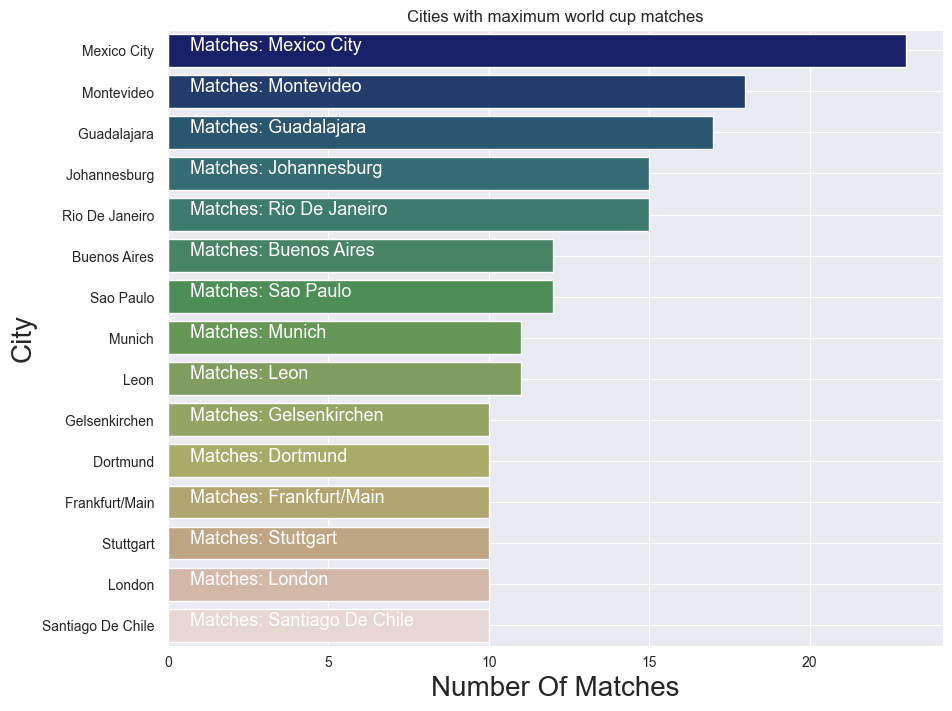

In [156]:
mat_c = df_matches["City"].value_counts().reset_index()
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=mat_c["count"][:15],
                 y=mat_c["City"][:15],
                 palette="gist_earth",
                 linewidth=1)
plt.xlabel("Number Of Matches", fontsize=20)
plt.ylabel("City", fontsize=20)
plt.title("Cities with maximum world cup matches")

for i, j in enumerate("Matches: " + mat_c["City"][:15].astype(str)):
    ax.text(.7, i, j, fontsize=13, color="w")

plt.grid(True)
plt.show()


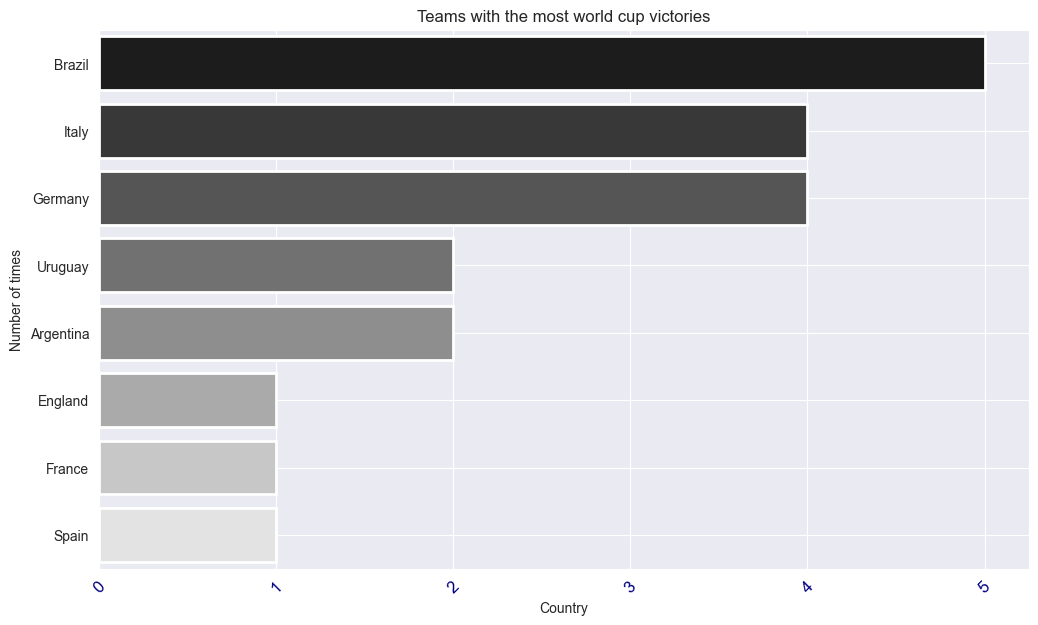

In [154]:
df_cups["Winner"] = df_cups["Winner"].replace("Germany FR", "Germany")
df_cups["Runners-Up"] = df_cups["Runners-Up"].replace("Germany FR", "Germany")

cou = df_cups["Winner"].value_counts().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot( y="Winner",x = "count" ,data=cou, palette="binary_r",
            linewidth=2)
plt.grid(True)
plt.ylabel("Number of times")
plt.xlabel("Country")
plt.title("Teams with the most world cup victories")
plt.xticks(rotation=45, color="navy", fontsize=12)  # Rotate x-axis labels for better visibility
plt.show()


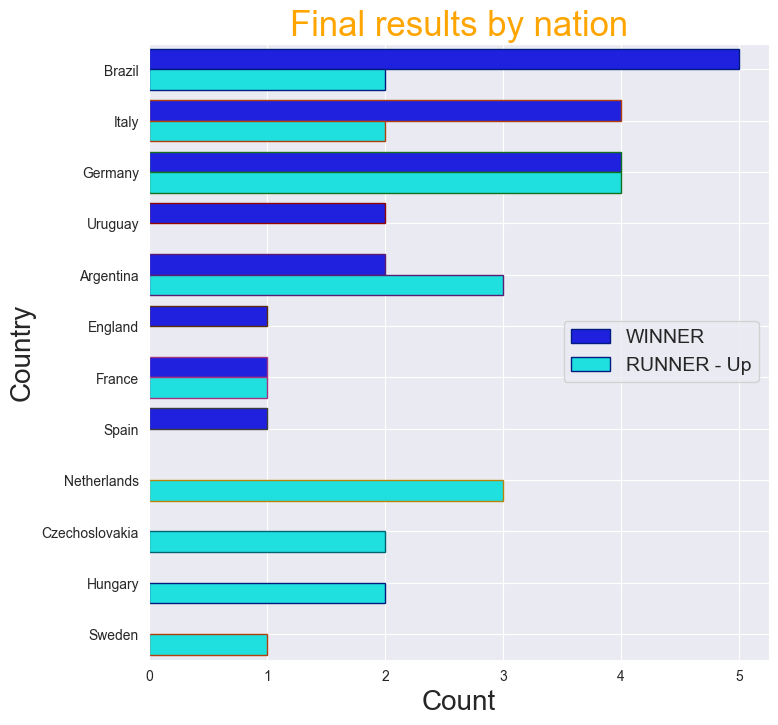

In [122]:
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = df_cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,8))
sns.barplot(x="count",
            y="country",
            data=cou_t,
            hue="type",
            palette=["b","cyan"],
            linewidth=1,
           edgecolor=sns.color_palette("dark", len(cou_t)))
plt.xlabel("Count", fontsize=20)
plt.ylabel("Country", fontsize=20)
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation" , fontsize = 25 , color = "orange")
plt.show()

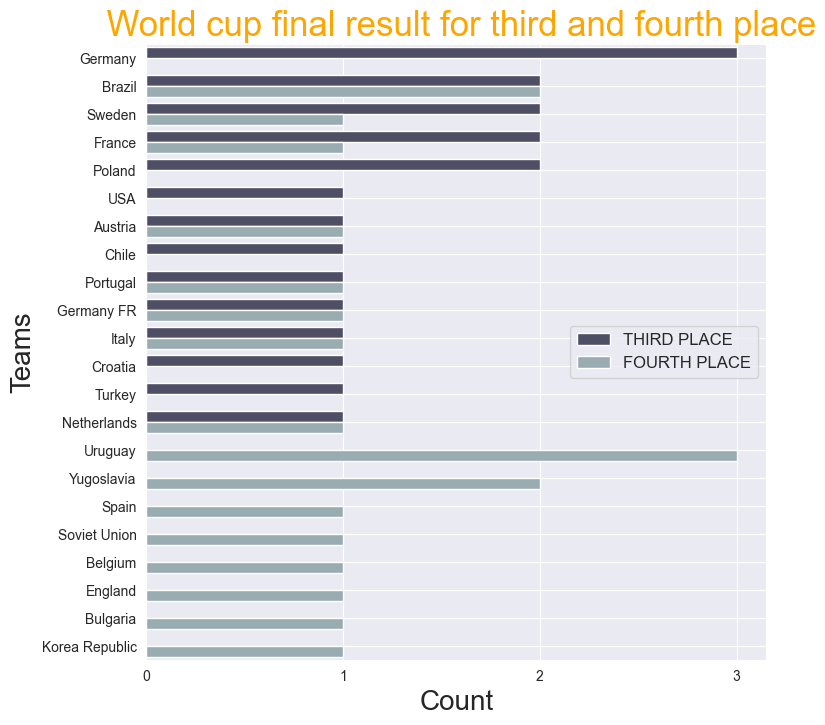

In [125]:
third = df_cups["Third"].value_counts().reset_index()
third.columns = ["team","count"]
third["type"] = "THIRD PLACE"

fourth = df_cups["Fourth"].value_counts().reset_index()
fourth.columns = ["team","count"]
fourth["type"] = "FOURTH PLACE"

plcs = pd.concat([third,fourth],axis=0)

plt.figure(figsize=(8,8))
sns.barplot(x = "count",y = "team",data=plcs,hue="type",
           linewidth=1,
           palette = "bone")
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.xlabel("Count", fontsize=20)
plt.ylabel("Teams", fontsize=20)
plt.title(" World cup final result for third and fourth place" , fontsize = 25 , color = "orange")
plt.legend(loc="center right",prop={"size":12})
plt.show()

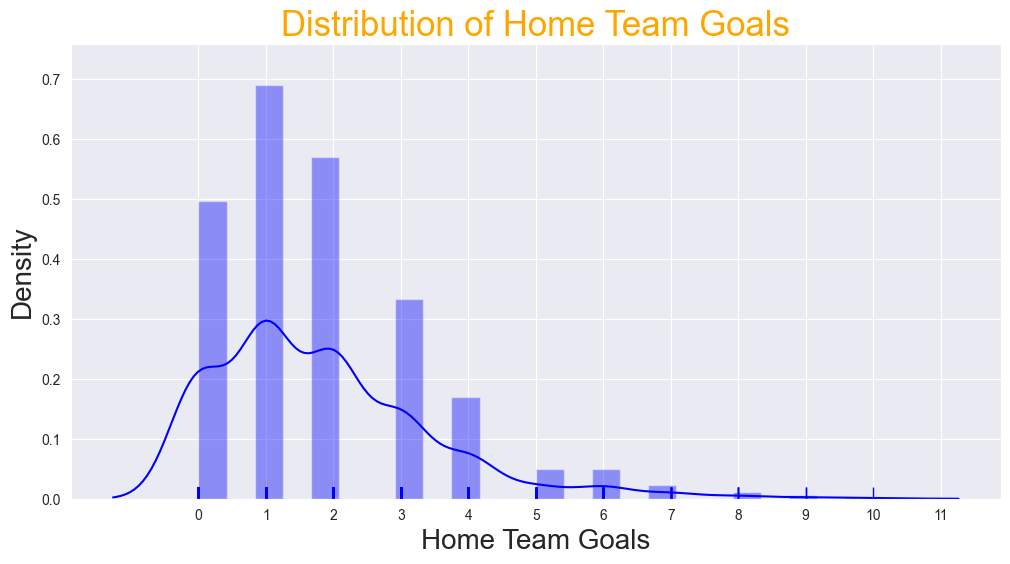

In [126]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(df_matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.xlabel("Home Team Goals", fontsize=20)
plt.ylabel("Density", fontsize=20)    
plt.title("Distribution of Home Team Goals" , fontsize = 25 , color = "orange")
plt.show()

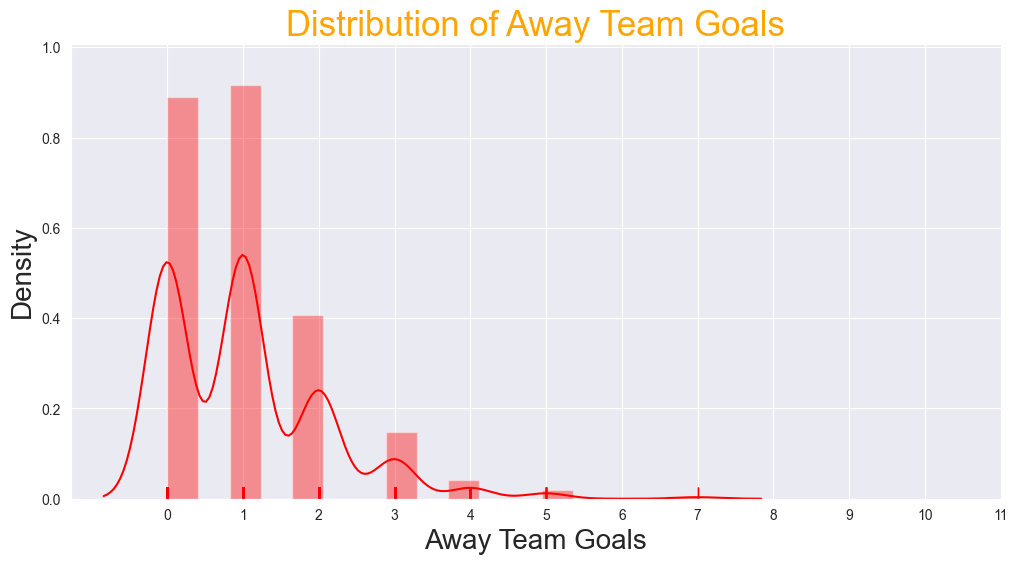

In [127]:
plt.figure(figsize=(12,13))
plt.subplot(212)
sns.distplot(df_matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,12,1))
plt.xlabel("Away Team Goals", fontsize=20)
plt.ylabel("Density", fontsize=20)    
plt.title("Distribution of Away Team Goals" , fontsize = 25 , color = "orange")
plt.show()

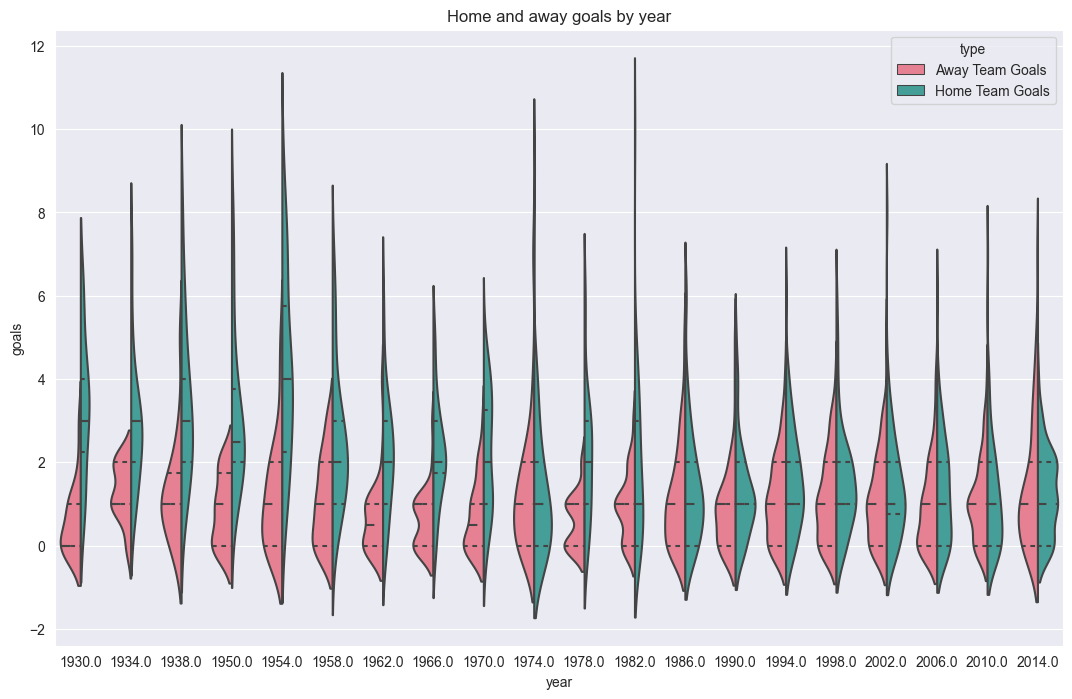

In [129]:
gh = df_matches[["Year","Home Team Goals"]]
gh.columns = ["year","goals"]
gh["type"] = "Home Team Goals"

ga = df_matches[["Year","Away Team Goals"]]
ga.columns = ["year","goals"]
ga["type"] = "Away Team Goals"

goals = pd.concat([ga,gh],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(data=goals, x="year",y="goals",
               hue="type",split=True,inner="quart",palette="husl")

plt.title("Home and away goals by year")
plt.show()

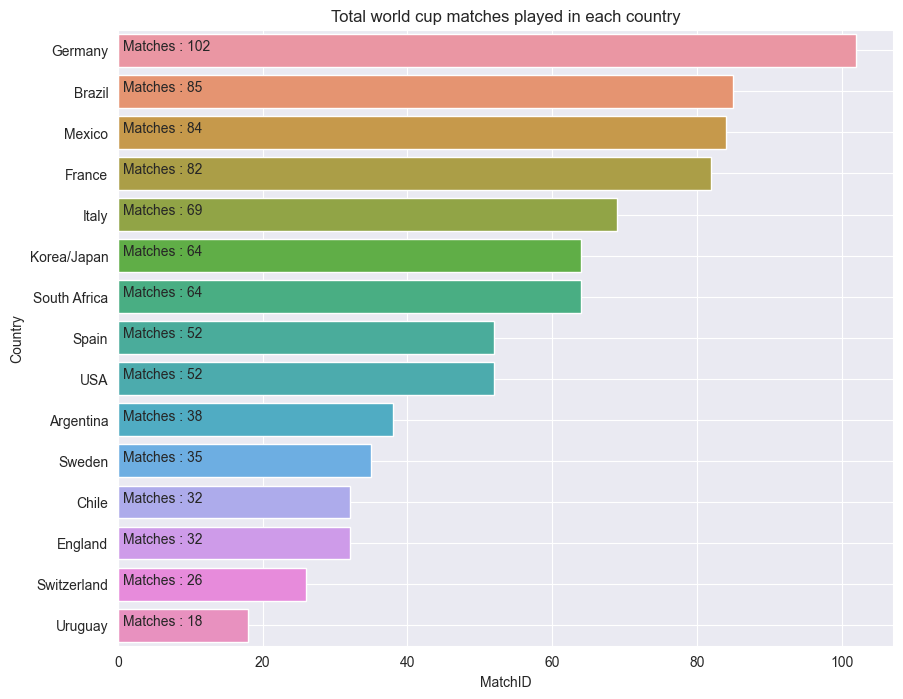

In [138]:
ysc = df_matches[["Year","Stadium","City","MatchID"]]
cy  = df_cups[["Year","Country"]]
ysc = ysc.merge(cy,left_on="Year",right_on="Year",how="left")
#ysc["Stadium"] = ysc["Stadium"].str.split(",").str[0]
ysc["std_cty"] = ysc["Stadium"] +" , "+ ysc["City"]

cnt_mat  =  ysc.groupby("Country")["MatchID"].nunique().reset_index()
cnt_mat  =  cnt_mat.sort_values(by= "MatchID",ascending=False)
cnt_mat


plt.figure(figsize=(10,8))

ax = sns.barplot(x = "MatchID",y = "Country",
                data=cnt_mat,
                linewidth=1
                )

for i,j in enumerate("Matches : " + cnt_mat["MatchID"].astype(str)):
    ax.text(.7 ,i,j)

plt.title("Total world cup matches played in each country")
plt.grid(True)
plt.show()

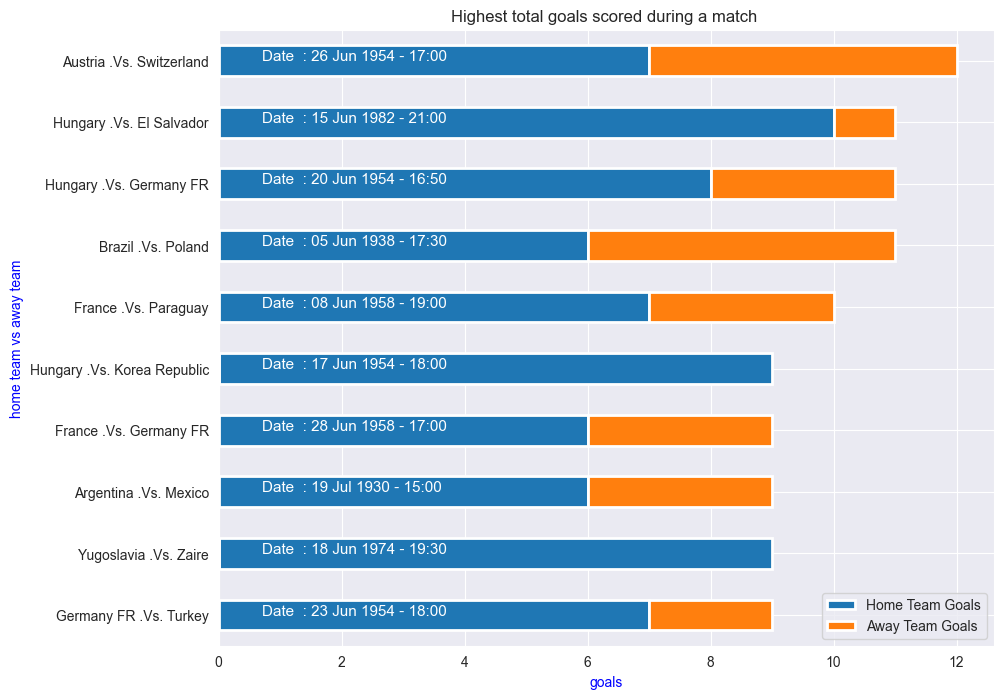

In [160]:
df_matches["total_goals"] = df_matches["Home Team Goals"] + df_matches["Away Team Goals"]
hig_gl = df_matches.sort_values(by="total_goals",ascending =False)[:10][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,8),linewidth=2
                                                       )

plt.ylabel("home team vs away team",color="b")
plt.xlabel("goals",color="b")
plt.title("Highest total goals scored during a match ")

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)
    
plt.show()

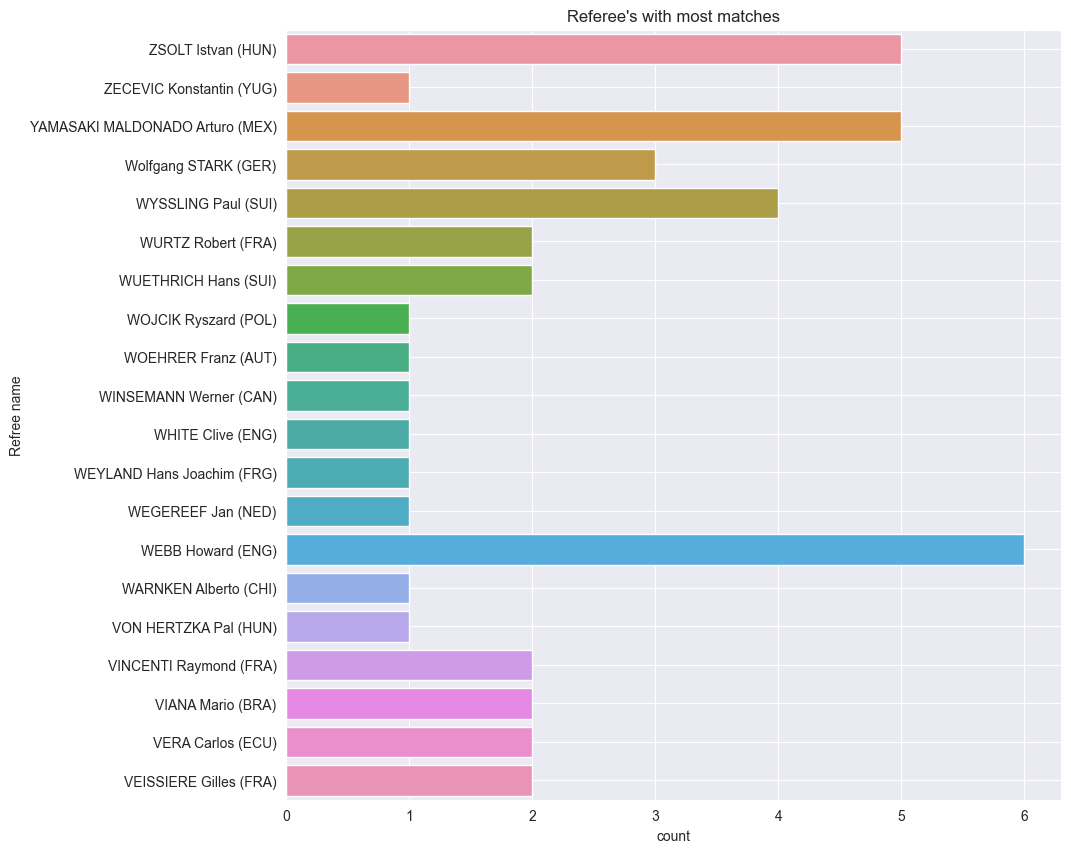

In [151]:
ref = df_matches["Referee"].value_counts().reset_index()
ref = ref.sort_values(by="Referee",ascending=False)
ref

plt.figure(figsize=(10,10))
sns.barplot(y = "Referee",x = "count",data=ref[:20],linewidth=1)
plt.xlabel("count")
plt.ylabel("Refree name")
plt.grid(True)
plt.title("Referee's with most matches")
plt.show()

In [141]:
import networkx as nx 

def interactions(year,color):
    
    df  =  df_matches[df_matches["Year"] == year][["Home Team Name","Away Team Name"]]
    G   = nx.from_pandas_edgelist(df,"Home Team Name","Away Team Name")
    
    plt.figure(figsize=(10,9))
    
    nx.draw_kamada_kawai(G,with_labels = True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "h",
                         linewidths  = 5 ,
                         font_size  = 13 ,
                         alpha=.8)
    
    plt.title("Interaction between teams :" + str(year) , fontsize =13 , color = "navy")

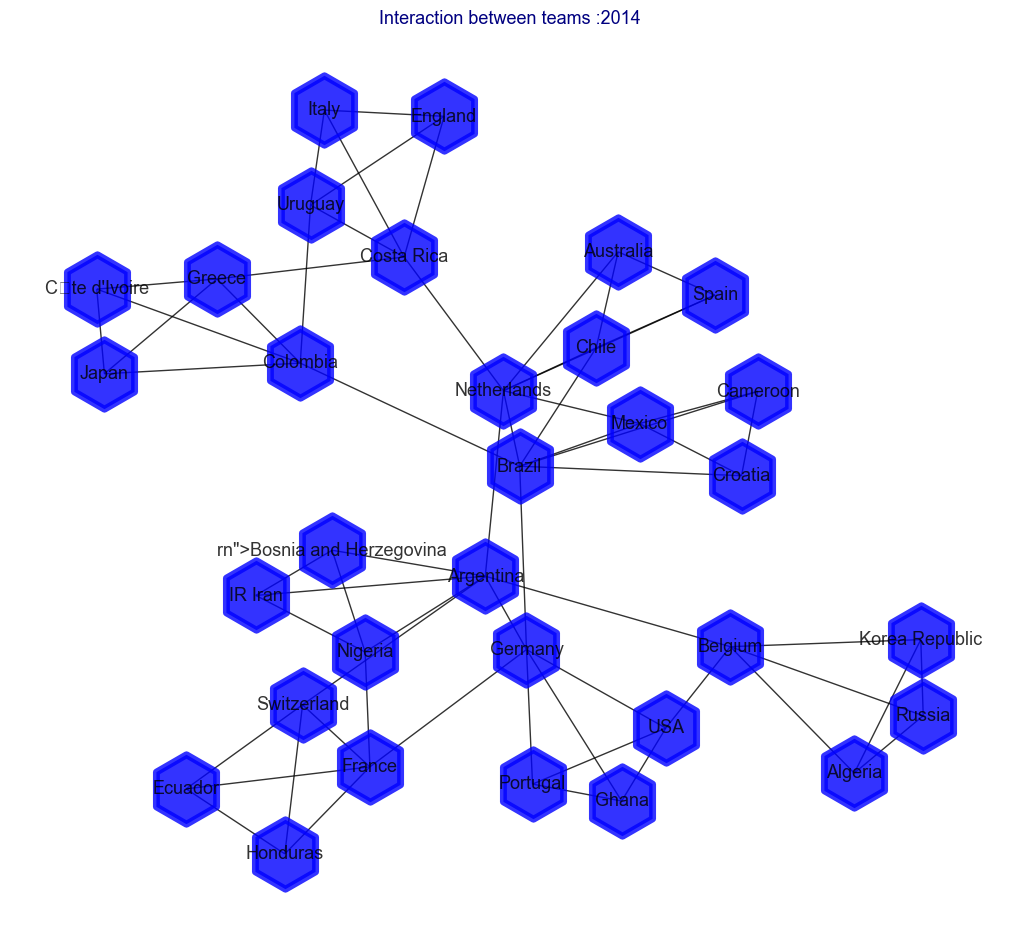

In [142]:
interactions(2014, "b")

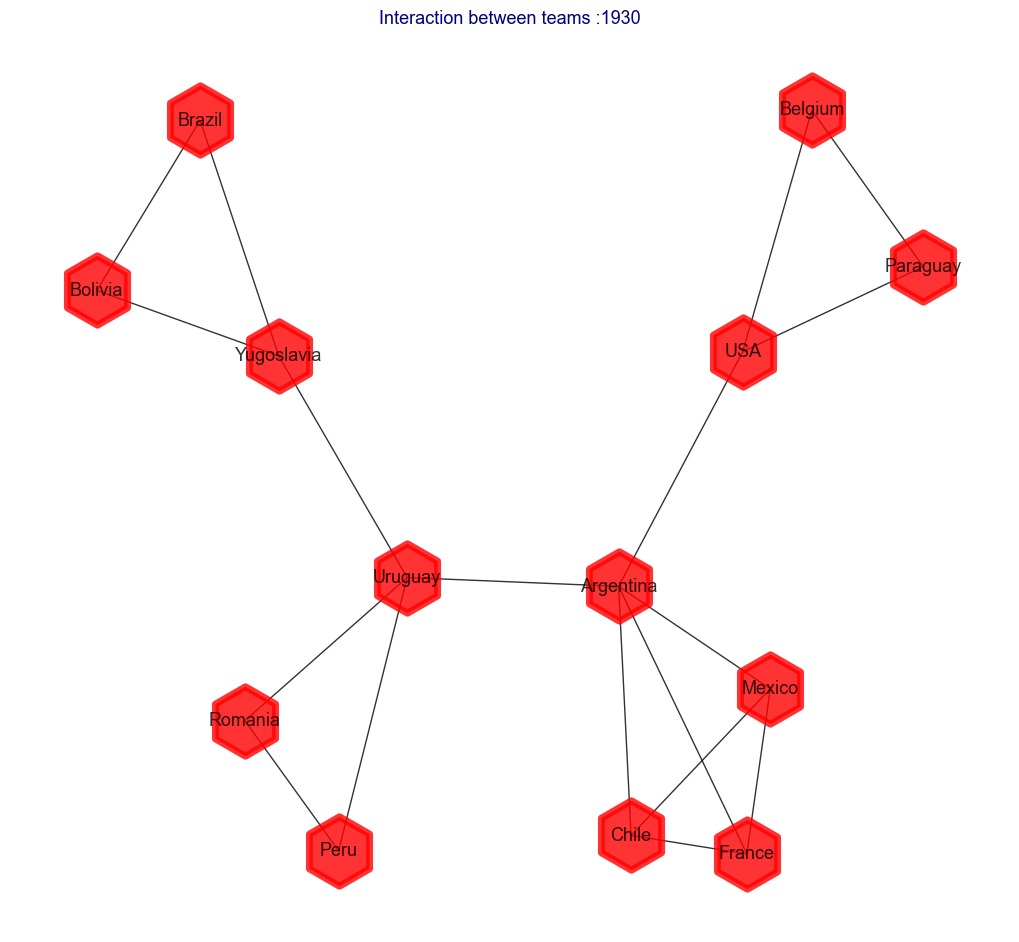

In [143]:
interactions(1930,"red")

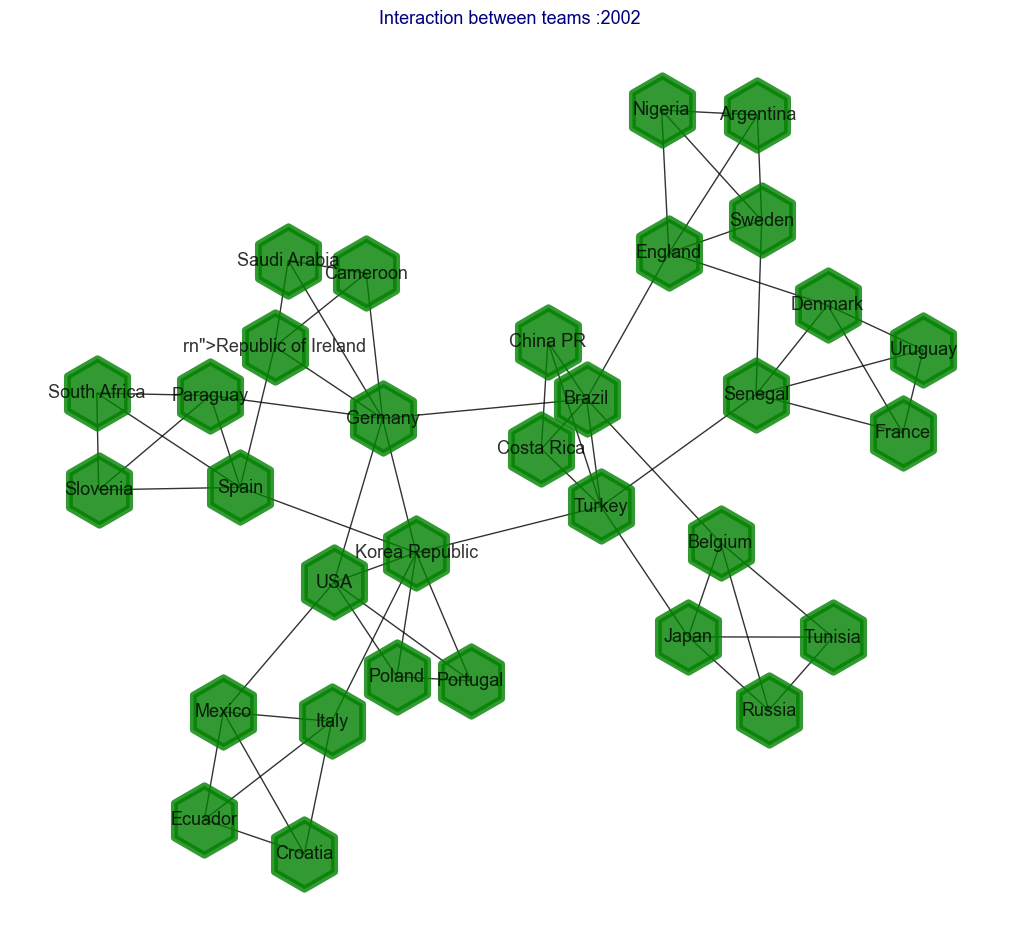

In [144]:
interactions(2002,"green")

In [161]:
ysc["Country_yr"] = ysc["Country"] + " - " + ysc["Year"].astype(str)


def stadium_country(country,color):
    
    dat2 = ysc[ysc["Country"] == country]
    
    plt.figure(figsize=(10,8))

    H = nx.from_pandas_edgelist(dat2,"Country","Stadium")

    nx.draw_kamada_kawai(H,
                         with_labels=True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "s",
                         linewidths  = 7 ,
                         font_size  = 13 ,
                         alpha=.8)

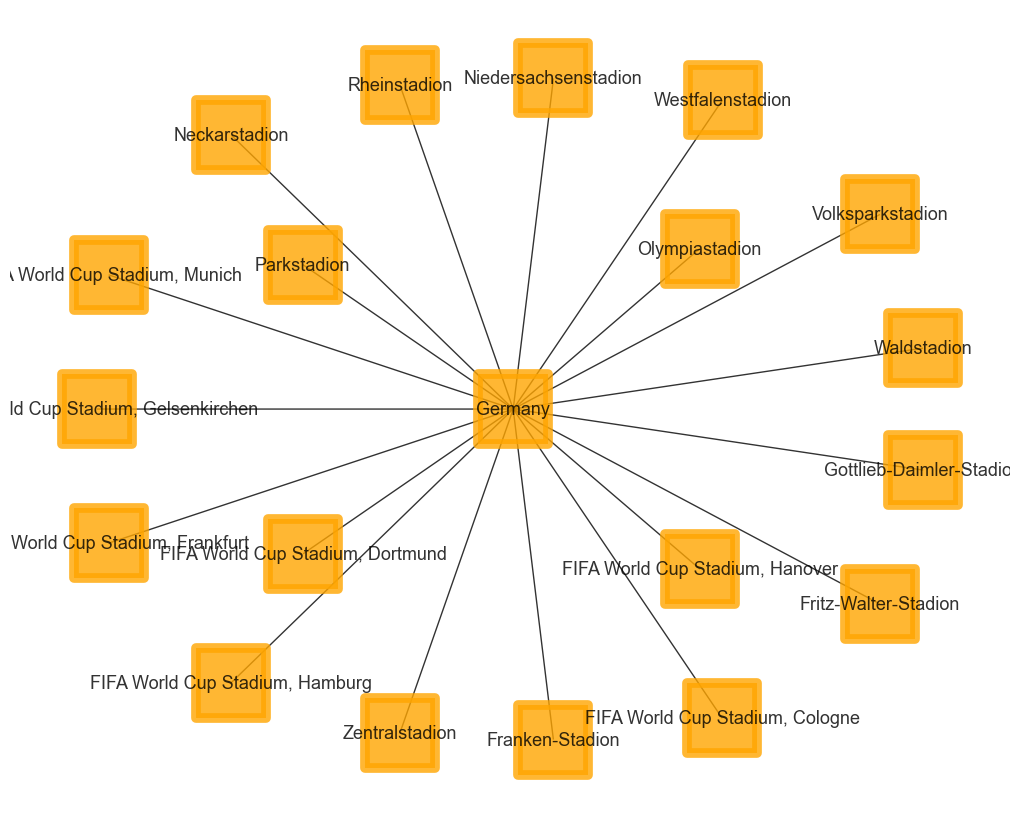

In [162]:
stadium_country("Germany","orange")

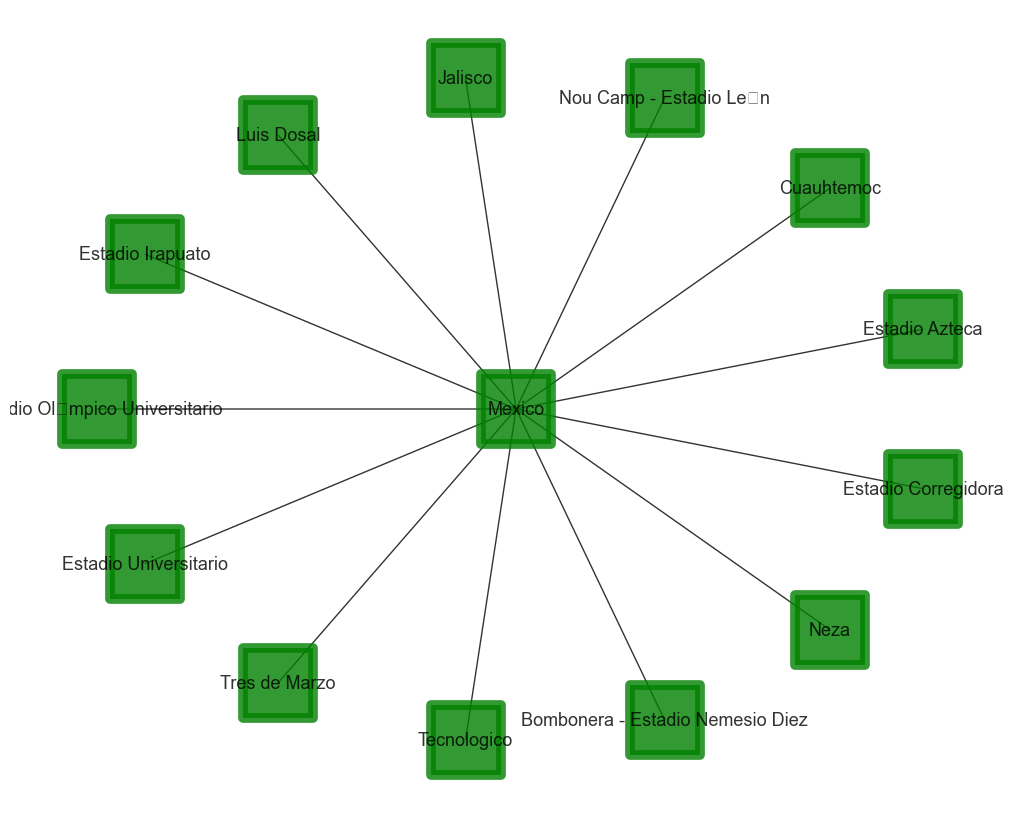

In [163]:
stadium_country('Mexico',"green")

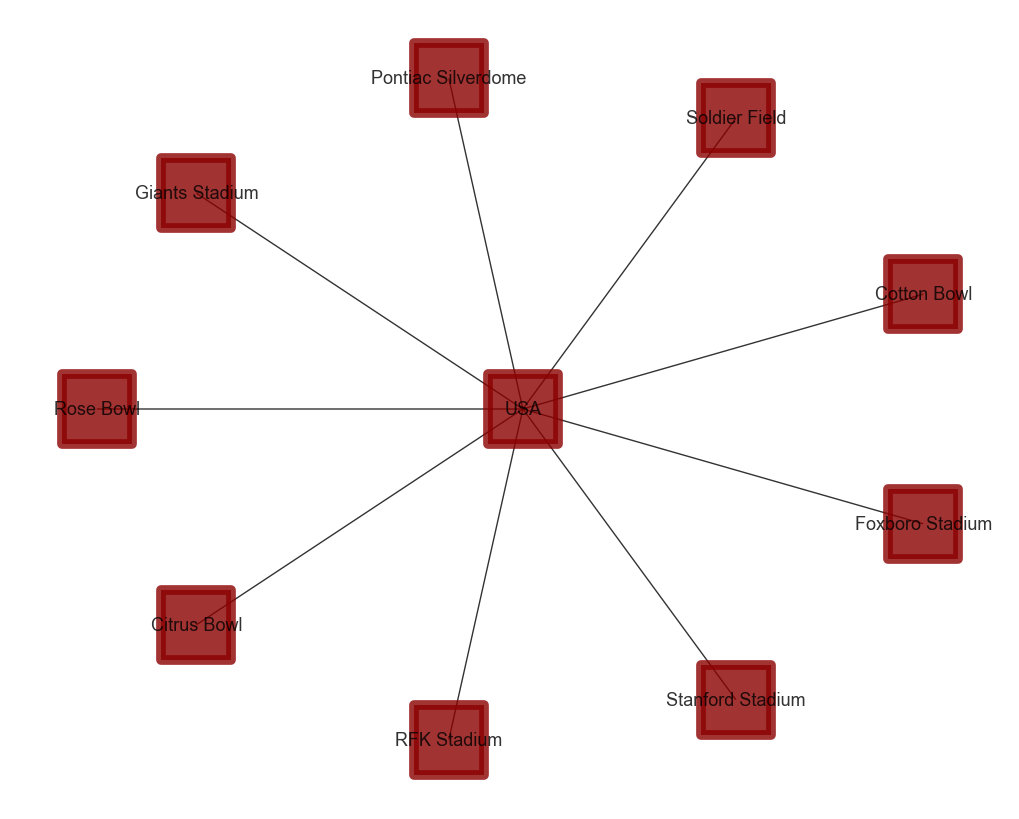

In [164]:
stadium_country('USA',"darkred")

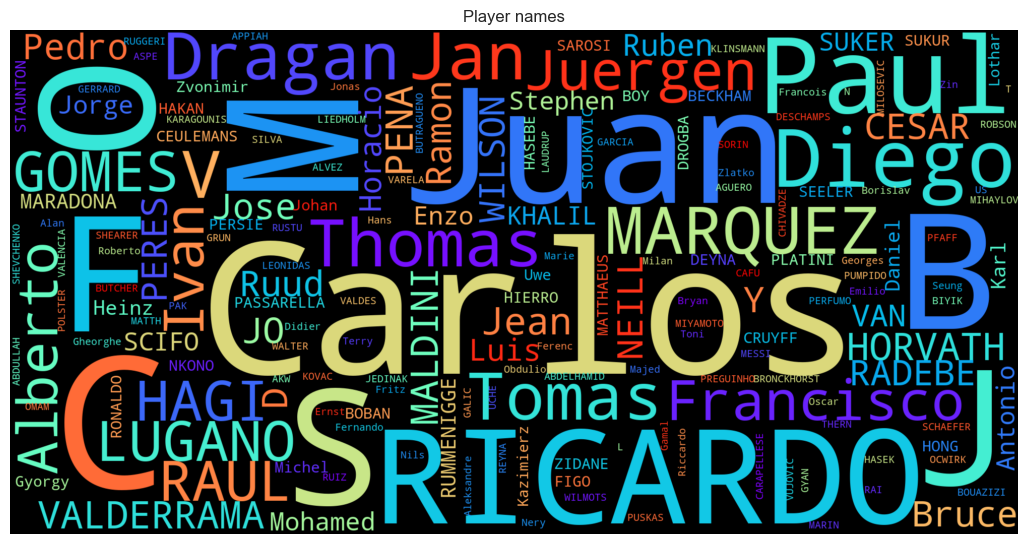

In [135]:
from wordcloud import WordCloud, STOPWORDS
wrds = df_players["Player Name"].value_counts().keys()

wc = WordCloud(scale=5,max_words=1000,colormap="rainbow").generate(" ".join(wrds))
plt.figure(figsize=(13,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Player names")
plt.show()

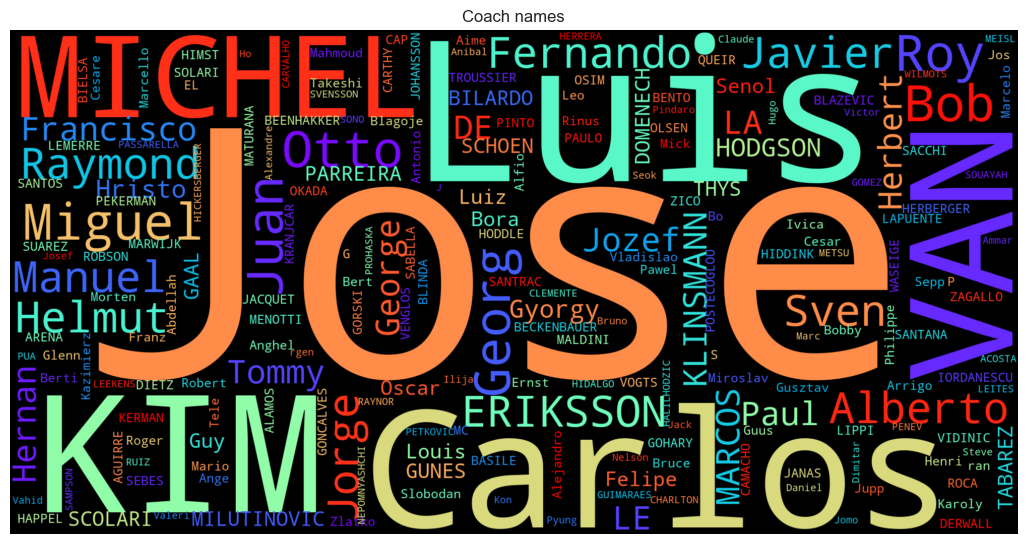

In [134]:
wrds1 = df_players["Coach Name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(13,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Coach names")
plt.show()


Research question 1
Which national teams are considered to be fovarites of the World Cup according to their goals?
This research question is identifying Top participants of World Cup by their goals scored at several matches.Firstly,

In [165]:
# Select relevant columns for home teams
home_goals = df_matches[["Home Team Name", "Home Team Goals"]].rename(
    columns={"Home Team Name": "Team", "Home Team Goals": "Goals"}
)

# Select relevant columns for away teams
away_goals = df_matches[["Away Team Name", "Away Team Goals"]].rename(
    columns={"Away Team Name": "Team", "Away Team Goals": "Goals"}
)

# Concatenate home and away goals data
total_goals_data = pd.concat([home_goals, away_goals], ignore_index=True)

# Group by team and sum the goals
total_goals = total_goals_data.groupby("Team")["Goals"].sum().reset_index()

# Sort the teams by total goals in descending order to identify top participants
total_goals = total_goals.sort_values(by="Goals", ascending=False)

# Display the top teams by total goals
print(total_goals.head())


          Team  Goals
7       Brazil  221.0
2    Argentina  131.0
29  Germany FR  131.0
39       Italy  128.0
26      France  106.0



Findings and comments to RQ1:
According to barchart following national teams are considered to be favorites of World Cup: Brazil,Argentina,Germany,Italy,
    France,Spain,Netherlands,Hungary and Uruguay. Brazil have won World Cup 5 times and footbal appeared in this country, 
    that is why Brazil on the first place.Also, we can see big fluctuation after Brazil and gradualy decreases from Argentina
    to Uruguay.Next interesting thing that I found that only South American and European countries are considered to be 
    favorites.

